**Import necessary Packages**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score
%matplotlib inline

**Read the data using pandas framework with column names label and message**

In [ ]:
dataset = pd.read_csv('/content/student_staff.csv',names=['label','replies'])

Display first five rows from the dataset

In [ ]:
dataset.head()

,label,replies
0,student,hi i am a student from this faculty
1,student,student
2,student,yes I am a student who studying in this faculty
3,student,yes i am artificial intelligence department st...
4,student,i am a student


**Based on the labels, the number of student & notstudent replies are counted and plotted**

In [ ]:
dataset.groupby('label').describe()

replies                                                               
          count unique                                                top freq
label                                                                         
staff       200    198     I am a member of the staff at this university.    2
student     200    197  I am here to take advantage of the unique oppo...    2
unknown     300    297                                        I am a car.    2

In [ ]:
dataset.label.value_counts()

unknown    300
student    200
staff      200
Name: label, dtype: int64

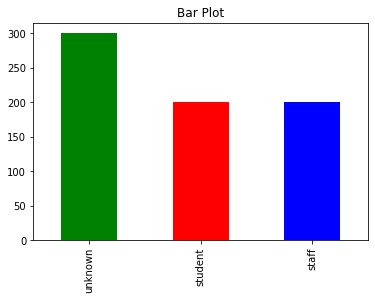

In [ ]:
count_Class=pd.value_counts(dataset["label"], sort= True)
count_Class.plot(kind = 'bar',color = ["green","red","blue"])
plt.title('Bar Plot')
plt.show()

**Now the labels are given a binary class**

**Staff : 100**

**Student : 010**

**Unknown : 001**

In [ ]:
labelling = pd.get_dummies(dataset['label'])
print(labelling)
#dataset['label'] = dataset['label'].replace({"student": [1,0,0], "notstudent": [0,1,0], "unknown": [0,0,1]})

     staff  student  unknown
0        0        1        0
1        0        1        0
2        0        1        0
3        0        1        0
4        0        1        0
..     ...      ...      ...
695      0        0        1
696      0        0        1
697      0        0        1
698      0        0        1
699      0        0        1

[700 rows x 3 columns]


**Import Necessary for text preprocessing & Training**

In [ ]:
# helps in text preprocessing
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# helps in model building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.callbacks import EarlyStopping

# split data into train and test set
from sklearn.model_selection import train_test_split

**Dataset split into Train & Test**

In [ ]:
X = dataset['replies'].values
y = labelling.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=530)

**Text Pre-Processing**

**1. Tokenization**

**2. Text Encoding**

**3. Padding**

In [ ]:
t = Tokenizer()
t.fit_on_texts(X_train)

In [ ]:
encoded_train = t.texts_to_sequences(X_train)
encoded_test = t.texts_to_sequences(X_test)
print(encoded_train[0:2])

[[26, 1, 2, 8, 76, 6], [1, 2, 3, 227]]


In [ ]:
max_length = 50
padded_train = pad_sequences(encoded_train, maxlen=max_length, padding='post')
padded_test = pad_sequences(encoded_test, maxlen=max_length, padding='post')
print(padded_train)

[[26  1  2 ...  0  0  0]
 [ 1  2  3 ...  0  0  0]
 [ 1  2  3 ...  0  0  0]
 ...
 [ 1 35 26 ...  0  0  0]
 [ 1  2 18 ...  0  0  0]
 [ 1  2  3 ...  0  0  0]]


#### **Model is Built with vocabulary size as the input size.** 

**Model is compiled and summary generated**

In [ ]:
vocab_size = len(t.word_index) + 1

# define the model
model = Sequential()
model.add(Embedding(vocab_size, 24, input_length=max_length))
model.add(SimpleRNN(24, return_sequences=False)) # RNN Application
model.add(Dense(3, activation='softmax'))

# compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# summarize the model
print(model.summary())

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_21 (Embedding)    (None, 50, 24)            10776     
                                                                 
 simple_rnn_21 (SimpleRNN)   (None, 24)                1176      
                                                                 
 dense_21 (Dense)            (None, 3)                 75        
                                                                 
Total params: 12,027
Trainable params: 12,027
Non-trainable params: 0
_________________________________________________________________
None


#### **Model is trained and validated for test dataset with 50 epochs.**

**Callback is made at an early stage when the validation loss has its first minimum value.**

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# fit the model
model.fit(x=padded_train,
         y=y_train,
         epochs=50,
         validation_data=(padded_test, y_test), verbose=1,
         callbacks=[early_stop] )

Epoch 1/50
18/18 [==============================] - 2s 38ms/step - loss: 0.9636 - accuracy: 0.5786 - val_loss: 0.7554 - val_accuracy: 0.7643
Epoch 2/50
18/18 [==============================] - 0s 21ms/step - loss: 0.6582 - accuracy: 0.8214 - val_loss: 0.6267 - val_accuracy: 0.8214
Epoch 3/50
18/18 [==============================] - 0s 22ms/step - loss: 0.4661 - accuracy: 0.9071 - val_loss: 0.5110 - val_accuracy: 0.8429
Epoch 4/50
18/18 [==============================] - 1s 35ms/step - loss: 0.3415 - accuracy: 0.9411 - val_loss: 0.3732 - val_accuracy: 0.8857
Epoch 5/50
18/18 [==============================] - 1s 34ms/step - loss: 0.2535 - accuracy: 0.9571 - val_loss: 0.3297 - val_accuracy: 0.9214
Epoch 6/50
18/18 [==============================] - 0s 14ms/step - loss: 0.1894 - accuracy: 0.9750 - val_loss: 0.2887 - val_accuracy: 0.9071
Epoch 7/50
18/18 [==============================] - 0s 13ms/step - loss: 0.1377 - accuracy: 0.9786 - val_loss: 0.1972 - val_accuracy: 0.9714
Epoch 8/50
18

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def c_report(y_true, y_pred):
   print("Classification Report")
   print(classification_report(y_true, y_pred))
   acc_sc = accuracy_score(y_true, y_pred)
   print("Accuracy : "+ str(acc_sc))
   return acc_sc


#### **Model Predicted for test dataset.**

**Classification report and Confusion Matrix generated** 

In [ ]:
pred_test = model.predict(padded_test)
preds = (np.equal(pred_test, pred_test.max(axis=1, keepdims=True))).astype("int32")
# print(model.predict(padded_test) > 0.5)

5/5 [==============================] - 0s 6ms/step


In [ ]:
c_report(y_test, preds)

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        45
           1       0.97      0.91      0.94        35
           2       1.00      1.00      1.00        60

   micro avg       0.97      0.97      0.97       140
   macro avg       0.97      0.96      0.97       140
weighted avg       0.97      0.97      0.97       140
 samples avg       0.97      0.97      0.97       140

Accuracy : 0.9714285714285714


0.9714285714285714

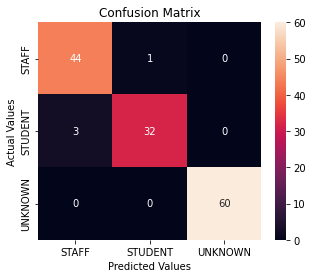

In [ ]:
cm = confusion_matrix(y_test.argmax(axis=1), preds.argmax(axis=1))
cm_df = pd.DataFrame(cm, index = ['STAFF','STUDENT','UNKNOWN'], columns = ['STAFF','STUDENT','UNKNOWN'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

sms = ["I am an office staff."]
# sms = ["I am a student from Artificial Intelligence Department."]
# sms = ["I am a computer science student but not from this university"]
sms_proc = t.texts_to_sequences(sms) #tokenization
sms_proc = pad_sequences(sms_proc, maxlen=max_length, padding='post') #padding
pred = model.predict(sms_proc)
print(np.around(pred,decimals=3))

1/1 [==============================] - 0s 22ms/step
[[0.959 0.002 0.039]]


#### **Save the model and the tokenizer (pickle package helps us to save the tokenizer to use it on new messages)**

In [ ]:
model.save("student_model")

In [ ]:
import pickle
with open('student_model/tokenizer.pkl', 'wb') as output:
   pickle.dump(t, output)

#### **Load the model and the tokenizer and predict whether the new reply is a student, staff or unknown**

In [ ]:
import tensorflow as tf

s_model = tf.keras.models.load_model("student_model")
with open('student_model/tokenizer.pkl', 'rb') as input:
    tokenizer = pickle.load(input)

In [ ]:
# sms = ["i am a student from this faculty"]
# sms = ["i am a staff"]
sms = ["hello! how are you? im visiting mom next week"]
sms_proc = tokenizer.texts_to_sequences(sms)
sms_proc = pad_sequences(sms_proc, maxlen=max_length, padding='post')
pred = s_model.predict(sms_proc)
print(pred)

In [ ]:
!zip -r '/content/student_model.zip' '/content/student_model'

  adding: content/student_model/ (stored 0%)
  adding: content/student_model/saved_model.pb (deflated 90%)
  adding: content/student_model/assets/ (stored 0%)
  adding: content/student_model/tokenizer.pkl (deflated 44%)
  adding: content/student_model/keras_metadata.pb (deflated 86%)
  adding: content/student_model/variables/ (stored 0%)
  adding: content/student_model/variables/variables.index (deflated 60%)
  adding: content/student_model/variables/variables.data-00000-of-00001 (deflated 9%)


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [ ]:
pip list | grep tensorflow

tensorflow                    2.9.2
tensorflow-datasets           4.6.0
tensorflow-estimator          2.9.0
tensorflow-gcs-config         2.9.1
tensorflow-hub                0.12.0
tensorflow-io-gcs-filesystem  0.28.0
tensorflow-metadata           1.12.0
tensorflow-probability        0.17.0


In [ ]:
!python -V

Python 3.8.16
